Importing relevant libraries

In [1]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


Loading and preparing the data // sample

In [3]:
os.chdir(r"c:\Users\shubh\OneDrive - iitgn.ac.in\Desktop\Projects\ML\Assignm1\UCI_HAR_Dataset")
path_now = os.getcwd()
# print(os.getcwd())


dfs = []
# # Load your dataset
action_types = ['LAYING', 'STANDING', 'SITTING', 'WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS']
# csv_directory = []
# for action in action_types:
#     for i in range(6):
#         csv_directory = csv_directory + [os.path.join(path_now,"Task4", "Data_New","Data_New")] #,action+"_"+str(i+1))]

csv_directory = os.path.join(path_now,"Task4", "Data_New","Data_New")
print(len(csv_directory))
action_freq = []

sum_freq = []
for filename in os.listdir(csv_directory):
    print(filename)
    # print(csv_directory)
    filepath = os.path.join(csv_directory, filename)
    # print(filepath)
    # Read the CSV file
    df = pd.read_csv(filepath, delimiter=',')
    df = df.drop('TgF', axis = 1)
    df = df.drop('time', axis = 1)
    # print(df)
    df.columns = ['accx', 'accy', 'accz']
    # print(df)
    # Append the DataFrame to the list
    dfs.append(df)

    # Optionally, print the filename to confirm processing
    # print(f"Processed test: {filename}")
    # print(len(df))
    sum_freq = sum_freq + [len(df)]

 
print(sum_freq)

for i in range(0, len(sum_freq), 6):
    # Sum the current chunk of 6 elements and append the sum to the new list
    chunk_sum = sum(sum_freq[i:i+6])
    action_freq.append(chunk_sum)

print(action_freq)



106
Climb_Up_1.csv
Climb_Up_2.csv
Climb_Up_3.csv
Climb_Up_4.csv
Climb_Up_5.csv
Climb_Up_6.csv
Laying_1.csv
Laying_2.csv
Laying_3.csv
Laying_4.csv
Laying_5.csv
Laying_6.csv
Sitting_1.csv
Sitting_2.csv
Sitting_3.csv
Sitting_4.csv
Sitting_5.csv
Sitting_6.csv
Standing_1.csv
Standing_2.csv
Standing_3.csv
Standing_4.csv
Standing_5.csv
Standing_6.csv
Walking_Downstairs_1.csv
Walking_Downstairs_2.csv
Walking_Downstairs_3.csv
Walking_Downstairs_4.csv
Walking_Downstairs_5.csv
Walking_Downstairs_6.csv
walk_1.csv
walk_2.csv
walk_3.csv
walk_4.csv
walk_5.csv
walk_6.csv
[732, 769, 843, 730, 771, 779, 716, 1169, 964, 847, 622, 838, 1038, 909, 903, 868, 783, 769, 552, 726, 754, 654, 979, 979, 621, 642, 774, 614, 589, 657, 731, 719, 799, 633, 893, 921]
[4624, 5156, 5270, 4644, 3897, 4696]


In [4]:
print(action_freq)
print(sum(action_freq))
# Combine all DataFrames into one DataFrame
combined_df = pd.concat(dfs, ignore_index=True)

# Check the result
print(combined_df.shape)  # Print the shape of the combined DataFrame
print(combined_df)  # Print the first few rows of the combined DataFrame


[4624, 5156, 5270, 4644, 3897, 4696]
28287
(28287, 3)
         accx    accy    accz
0      0.9883 -0.0447  0.0562
1      0.9854 -0.0481  0.0501
2      0.9956 -0.0640  0.0007
3      1.0039 -0.0706 -0.0000
4      1.0130 -0.0623  0.0090
...       ...     ...     ...
28282  1.2234 -0.2779  0.0058
28283  1.1741 -0.1879  0.0178
28284  0.9345  0.0812  0.0816
28285  0.8160  0.0433  0.1530
28286  0.8697  0.0125  0.1740

[28287 rows x 3 columns]


In [5]:
new_action_types = ['WALKING_UPSTAIRS','LAYING', 'SITTING', 'STANDING', 'WALKING_DOWNSTAIRS', 'WALKING']

y_label = []
for i in range(6):
    y_label = y_label + [new_action_types[i]] * action_freq[i]

# Create the DataFrame
df_y_label = pd.DataFrame({'y_train': y_label})

print(df_y_label)

                y_train
0      WALKING_UPSTAIRS
1      WALKING_UPSTAIRS
2      WALKING_UPSTAIRS
3      WALKING_UPSTAIRS
4      WALKING_UPSTAIRS
...                 ...
28282           WALKING
28283           WALKING
28284           WALKING
28285           WALKING
28286           WALKING

[28287 rows x 1 columns]


y train

In [8]:

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

#get_data
y_dataset = df_y_label.values.tolist()
X_dataset = combined_df.values.tolist()
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, test_size=0.3, random_state=42)


Train now !!! Decision Trees

In [9]:
from sklearn.tree import DecisionTreeClassifier

# n = 8

# Without setting random_state
# clf1 = DecisionTreeClassifier(max_depth= n, random_state= 43)

clf1 = DecisionTreeClassifier(random_state= 43)
clf1.fit(X_train, y_train)

# clf2 = DecisionTreeClassifier()
# clf2.fit(X_train, y_train)

DecisionTreeClassifier(random_state=43)

Now, Test and Predict , but wait, we are using the Train Set

Accuracy: 0.8039
Precision: 0.8034
Recall: 0.8039

Classification Report:
                     precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00      1526
           SITTING       1.00      1.00      1.00      1624
          STANDING       0.96      0.97      0.97      1358
           WALKING       0.57      0.56      0.57      1390
WALKING_DOWNSTAIRS       0.51      0.52      0.52      1191
  WALKING_UPSTAIRS       0.69      0.68      0.68      1398

          accuracy                           0.80      8487
         macro avg       0.79      0.79      0.79      8487
      weighted avg       0.80      0.80      0.80      8487



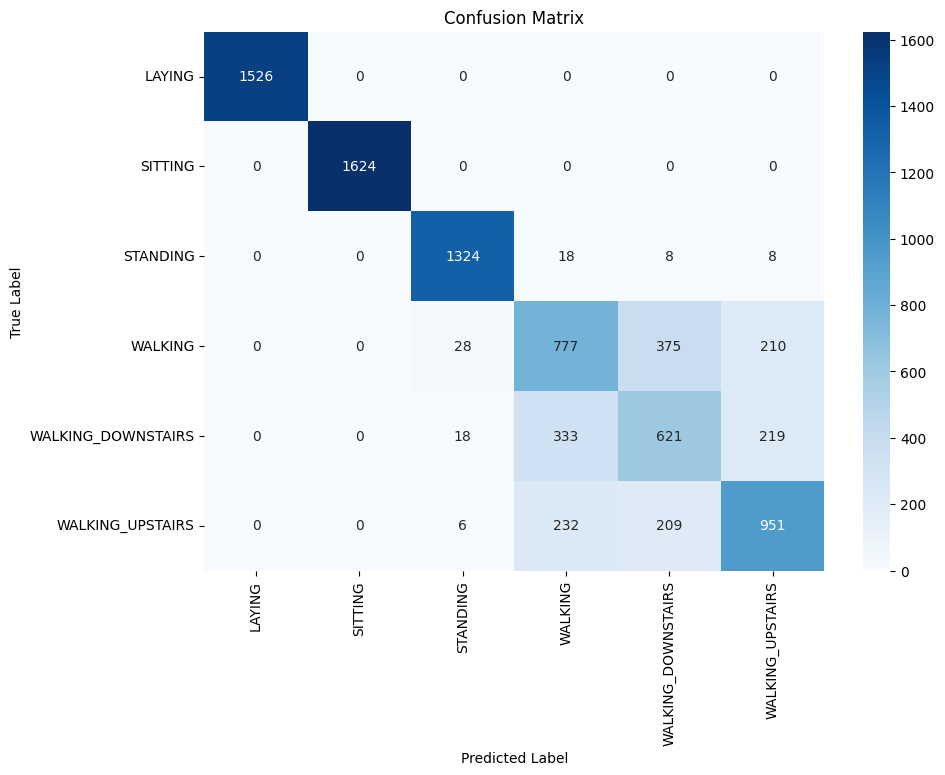

In [10]:
# Predict the test set
y_pred = clf1.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision, recall
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=clf1.classes_, yticklabels=clf1.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
